In [632]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [633]:
df=pd.read_csv('F:\\Predicting-House-Prices-In-Bengaluru-Train-Data.csv')
test=pd.read_csv('F:\\Predicting-House-Prices-In-Bengaluru-Test-Data.csv')
df=df.drop('society',1)
test=test.drop(['society','price'],1)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [634]:
df.shape

(13320, 8)

In [635]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

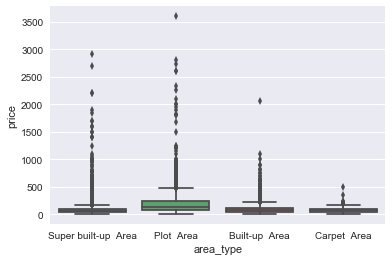

In [636]:
sns.boxplot(x=df['area_type'],y=df['price'])

In [637]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [638]:
le.fit(df['area_type'])
df['area_type']=le.transform(df['area_type'])
test['area_type']=le.transform(test['area_type'])

In [639]:
df['availability']=df['availability'].str.replace('Ready To Move','999')
test['availability']=test['availability'].str.replace('Ready To Move','999')
df['availability']=df['availability'].str.replace('Immediate Possession','99')
test['availability']=test['availability'].str.replace('Immediate Possession','99')

In [640]:
a=df['availability'].str.split('-')
df['availability']=a.str[0]
b=test['availability'].str.split('-')
test['availability']=b.str[0]
df['availability']=df['availability'].astype('float')
test['availability']=test['availability'].astype('float')

In [641]:
df['location']=df['location'].fillna('Whitefield')
df['size']=df['size'].fillna('2 BHK')
test['size']=test['size'].fillna('2 BHK')
df['bath']=df['bath'].fillna('2.0')
test['bath']=test['bath'].fillna('2.0')
test['balcony']=test['balcony'].fillna('1.0')
df['balcony']=df['balcony'].fillna('2.0')
test.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
dtype: int64

In [642]:
test['balcony'].mode()

0    1
dtype: object

In [643]:
df['location']=df['location'].str.replace('[^a-zA-Z]',' ')
test['location']=test['location'].str.replace('[^a-zA-Z]',' ')

In [644]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_df=0.9,stop_words='english',max_features=50,ngram_range=(2,2))

In [645]:
df_tf=pd.DataFrame(tf.fit_transform(df['location']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf_')
df=df.join(df_tf)
test_tf=pd.DataFrame(tf.fit_transform(test['location']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf_')
test=test.join(test_tf)
df=df.drop('location',1)
test=test.drop('location',1)

In [646]:
a=df['size'].str.split()
df['size']=a.str[0]
b=test['size'].str.split()
test['size']=b.str[0]
df['size']=df['size'].astype('float')
test['size']=test['size'].astype('float')

In [647]:
df['total_sqft']=df['total_sqft'].str.replace('[a-zA-Z]',' ')
test['total_sqft']=test['total_sqft'].str.replace('[a-zA-Z]',' ')
a=df['total_sqft'].str.split()
df['total_sqft']=a.str[0]
#b=a.str[0]
#c=b.str.split('S')
#c.str[0].value_counts()
b=test['total_sqft'].str.split()
test['total_sqft']=b.str[0]
df['total_sqft']=df['total_sqft'].astype('float')
test['total_sqft']=test['total_sqft'].astype('float')

In [648]:
df['bath']=df['bath'].astype('float')
test['bath']=test['bath'].astype('float')
df['balcony']=df['balcony'].astype('float')
test['balcony']=test['balcony'].astype('float')

In [665]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import scale

In [650]:
df=df[df['price']<500]

In [666]:
x=df.drop('price',1)
y=df['price']
x=scale(x)

In [686]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [678]:
from xgboost import XGBRegressor
clf= XGBRegressor(n_estimators=250,max_depth=5,subsample=0.9)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7347082224656918

In [679]:
dt=DecisionTreeRegressor(max_depth=6)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.6719503449476469

In [687]:
bag=BaggingRegressor(n_estimators=250)
bag.fit(x_train,y_train)
bag.score(x_test,y_test)

0.6851130639705284

In [681]:
from sklearn.ensemble import GradientBoostingRegressor
gb1=GradientBoostingRegressor(n_estimators=250,subsample=0.9)
gb1.fit(x_train,y_train)
gb1.score(x_test,y_test)

0.7265125773308316

In [682]:
test=scale(test)
y_test=clf.predict(test)

In [683]:
sub=pd.DataFrame(y_test)
sub.columns=['price']

In [684]:
sub.to_excel('F:\\prices.xlsx',index=False)

In [685]:
sub

,price
0,50.201717
1,235.960815
2,208.159210
3,72.567444
4,47.088806
5,82.674667
6,353.746277
7,43.068413
8,84.791855
9,203.542633
